### The objective is to develop a predictive model that determines the likelihood for a customer to churn- to stop purchasing airtime and data from Expresso.

#### Expresso is an africa telecommunications company  that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer 'churning', i.e becoming inactive and not making any transactions for 90days.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Train (1).csv')
test = pd.read_csv('test (1).csv')

In [3]:
sub = pd.read_csv('sample_submission.csv')

In [4]:
var = pd.read_csv('VariableDefinitions.csv')

In [5]:
var

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [6]:
#table for missing values in train_df

total = train.isnull().sum()
missing_per = (total /train.isnull().count())*100

miss_df = pd.DataFrame({'total_missing': total,
                       'missing_per': missing_per})
miss_df.sort_values('missing_per', ascending=False)

,total_missing,missing_per
ZONE2,374487,93.62175
ZONE1,368310,92.07750
TIGO,239386,59.84650
DATA_VOLUME,196854,49.21350
FREQ_TOP_PACK,167329,41.83225
TOP_PACK,167329,41.83225
ORANGE,166317,41.57925
REGION,157520,39.38000
ON_NET,145819,36.45475
MONTANT,140277,35.06925


In [7]:
#table for missing values in test_df

total = test.isnull().sum()
missing_per = total /test.isnull().count()*100

miss_df = pd.DataFrame({'total_missing': total,
                       'missing_per': missing_per})
miss_df.sort_values('missing_per', ascending=False)

,total_missing,missing_per
ZONE2,93578,93.578
ZONE1,92320,92.320
TIGO,59788,59.788
DATA_VOLUME,49338,49.338
FREQ_TOP_PACK,41703,41.703
TOP_PACK,41703,41.703
ORANGE,41200,41.200
REGION,39293,39.293
ON_NET,36383,36.383
FREQUENCE_RECH,34951,34.951


In [8]:
train.drop(['ZONE1', 'ZONE2'], axis=1, inplace=True)
test.drop(['ZONE1', 'ZONE2'], axis=1, inplace=True)

In [9]:
#joining the both data together
both_data = pd.concat([train, test], axis=1)

In [10]:
#train = both_data.iloc[:, :17]

#test = both_data.iloc[:,17:]

In [11]:
#separating the numeric variable from the categorical variable

cat_data = []
num_data = []
 
for i,c in enumerate(both_data.dtypes):
    if c == np.object:
        cat_data.append(both_data.iloc[:, i])
    else:
        num_data.append(both_data.iloc[:, i])

In [12]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [13]:
cat_data.head()

,user_id,REGION,TENURE,MRG,TOP_PACK,user_id,REGION,TENURE,MRG,TOP_PACK
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,NO,All-net 500F=2000F;5d,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NO,NaN
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,NO,"Data: 100 F=40MB,24H",5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NO,NaN
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,NO,All-net 500F=2000F;5d,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,NO,"Data: 100 F=40MB,24H"
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,NO,On net 200F=Unlimited _call24H,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,NO,IVR Echat_Daily_50F
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NO,NaN,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d


In [14]:
num_data.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,62.0,35.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40.0,22.0,0.0,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN
2,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,32.0,3.0,0.0,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,27.0,17.0
3,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18.0,3.0,0.0,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,46.0,3.0
4,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,50.0,NaN,0.0,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,61.0,65.0


In [15]:
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))#filling nan with highest frequents
cat_data.isnull().sum().any()

False

In [16]:
num_data = num_data.fillna(value=-999, axis=1)
num_data.isnull().sum().any()

False

In [17]:
train.MRG.value_counts()

NO    400000
Name: MRG, dtype: int64

In [18]:
import warnings
warnings.filterwarnings('ignore')

cat_data1 = cat_data.iloc[:, :5]
cat_data1.drop(['MRG'], axis=1, inplace=True)
cat_data1.head()

,user_id,REGION,TENURE,TOP_PACK
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,All-net 500F=2000F;5d
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,DAKAR,K > 24 month,"Data: 100 F=40MB,24H"
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,All-net 500F=2000F;5d
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,On net 200F=Unlimited _call24H
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,All-net 500F=2000F;5d


In [19]:
cat_data1['top_pack'] = cat_data1['TOP_PACK'].apply(lambda x: x.split('=')[0])

In [20]:
cat_data1['top_pack3'] = cat_data1['top_pack'].apply(lambda x: x.split(':')[0])

In [21]:
cat_data1.drop(['top_pack'], axis=1, inplace=True)

In [22]:
cat_data1.head()

,user_id,REGION,TENURE,TOP_PACK,top_pack3
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,All-net 500F=2000F;5d,All-net 500F
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,DAKAR,K > 24 month,"Data: 100 F=40MB,24H",Data
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,All-net 500F=2000F;5d,All-net 500F
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,On net 200F=Unlimited _call24H,On net 200F
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,All-net 500F=2000F;5d,All-net 500F


In [23]:
cat_data2 = cat_data.iloc[: , 5:]
cat_data2.drop(['MRG'], axis=1, inplace=True)
cat_data2.head()

,user_id,REGION,TENURE,TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,DAKAR,K > 24 month,All-net 500F=2000F;5d
1,5335efd940280b82143272275637d1e65d37eadb,DAKAR,K > 24 month,All-net 500F=2000F;5d
2,a581f4fa08677c26f83f643248c667e241043086,DAKAR,K > 24 month,"Data: 100 F=40MB,24H"
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,IVR Echat_Daily_50F
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,All-net 500F=2000F;5d


In [24]:
cat_data2['top_pack'] = cat_data2['TOP_PACK'].apply(lambda x : x.split('=')[0])

cat_data2['top_pack3'] = cat_data2['top_pack'].apply(lambda x: x.split(':')[0])

In [25]:
cat_data1.TENURE.value_counts()

K > 24 month     379439
I 18-21 month      8312
H 15-18 month      4858
G 12-15 month      2788
J 21-24 month      2325
F 9-12 month       1771
E 6-9 month         359
D 3-6 month         148
Name: TENURE, dtype: int64

In [26]:
cat_data2['tenure'] = cat_data2['TENURE'].apply(lambda x : x.split(' ')[0])

cat_data2['tenure'].value_counts()

K    394825
I      2113
H      1211
G       700
J       577
F       444
E        85
D        45
Name: tenure, dtype: int64

In [27]:
cat_data1['tenure'] = cat_data1['TENURE'].apply(lambda x : x.split(' ')[0])

In [28]:
cat_data1.drop(['TENURE', 'TOP_PACK'], axis=1, inplace=True)
cat_data2.drop(['TENURE', 'TOP_PACK'], axis=1, inplace=True)

In [29]:
num_data1 = num_data.iloc[:, :12]
num_data2 = num_data.iloc[:, 12:]

In [30]:
tr = pd.concat([cat_data1, num_data1], axis=1)
tes = pd.concat([cat_data2, num_data2], axis=1)

In [78]:
#train[train['user_id'] == '8ebce4e82fa049f96ff1aa460217171af4e4ede1']
tr.drop(tr[(tr['REGION'] == 'SAINT-LOUIS') & (tr['ORANGE'] < 0) & (tr['CHURN'] == 0)].index, inplace=True)
tes.drop(['top_pack'], axis=1, inplace=True)

In [32]:
display(tr[(tr['REGION']== 'DAKAR') & (tr['ORANGE'] < 0) & (tr['TIGO'] < 0) & (tr['MONTANT'] < 0) & (tr['FREQ_TOP_PACK']) & (tr['CHURN']==0)].shape)
tr[(tr['REGION']== 'DAKAR') & (tr['ORANGE'] < 0) & (tr['TIGO'] < 0) & (tr['MONTANT'] < 0) & (tr['FREQ_TOP_PACK']) & (tr['CHURN']==0)]

(51241, 16)

,user_id,REGION,top_pack3,tenure,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
6,b2d9c4bdceaafe305e8424c97f64e4ba880d0a97,DAKAR,All-net 500F,K,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,7.0,-999.0,0.0
9,cf5d5edda4805f7f526884cee8bde797213eeefa,DAKAR,All-net 500F,G,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,-999.0,0.0
31,c5e235b091ff35af162c3831dad63ad5e7ddacc1,DAKAR,All-net 500F,K,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,8.0,-999.0,0.0
32,30b970e5a992130758bce10a6f3aac956a3a60cb,DAKAR,All-net 500F,K,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,10.0,-999.0,0.0
35,b5a18669f9958f380c8ebb12b13a8fe3a13079a9,DAKAR,All-net 500F,K,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,11.0,-999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399975,1d3256f7504014aa5963caad4da5f1c72b5bb572,DAKAR,All-net 500F,K,-999.0,-999.0,7.0,2.0,1.0,-999.0,-999.0,-999.0,-999.0,15.0,-999.0,0.0
399991,2a92663555f9c237a0e69462625e8916b8182d5e,DAKAR,All-net 500F,K,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,6.0,-999.0,0.0
399992,6efd8294140f2e410b8cbbbafa77c2b096ca35a5,DAKAR,All-net 500F,K,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,30.0,-999.0,0.0
399996,13daa3a651bf0192a413b339c4766aeafc6d1636,DAKAR,All-net 500F,K,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,14.0,-999.0,0.0


In [58]:
#tr.drop(tr[(tr['REGION']== 'DAKAR') & (tr['ORANGE'] < 0) & (tr['TIGO'] < 0) & (tr['MONTANT'] < 0) & (tr['FREQ_TOP_PACK']) & (tr['CHURN']==0)].index, inplace=True)
tes[(tes['REGION']== 'DAKAR') & (tes['ORANGE'] < 0) & (tes['TIGO'] < 0) & (tes['MONTANT'] < 0) & (tes['FREQ_TOP_PACK'])]
tes.drop(tes[(tes['REGION']== 'DAKAR') & (tes['ORANGE'] < 0) & (tes['TIGO'] < 0) & (tes['MONTANT'] < 0) & (tes['FREQ_TOP_PACK'])].index, inplace=True)

In [34]:
def countplot_with_target(column):
    plt.figure(figsize= (15,9))
    sns.countplot(x= column, hue= tr['CHURN'], data=tr, color='b').set_title(column)
    plt.show()
    
def distplot(col):
    plt.figure(figsize=(12,9))
    sns.distplot(tr[col], bins=50)
    plt.show()

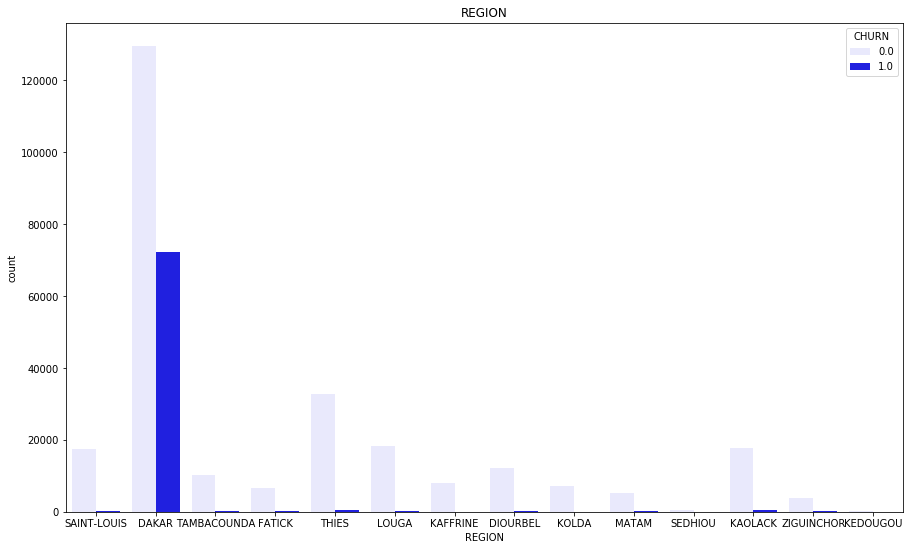

In [35]:
countplot_with_target('REGION')

In [36]:
#how many percent of yes(1) in saint louis
total = ((tr['REGION']=='SAINT-LOUIS') & (tr['CHURN'])).value_counts()
percent0 = (total[0] / tr['CHURN'].count())*100
percent1 = (total[1] / tr['CHURN'].count())*100
print("The percentage of 'no'(0) in saint-louis is {:.2f}".format(percent0))
print("The percentage of 'yes'(1) in saint-louis is {:.2f}:".format(percent1))
#how many percentage of yes(1) in dakar
total = ((tr['REGION']=='DAKAR') & (tr['CHURN'])).value_counts()
percent0 = (total[0] / tr['CHURN'].count())*100
percent1 = (total[1] / tr['CHURN'].count())*100
print("\nThe percentage of 'no'(0) in Dakar is {:.2f}".format(percent0))
print("The percentage of 'yes'(1) in Dakar is {:.2f}:".format(percent1))

The percentage of 'no'(0) in saint-louis is 99.92
The percentage of 'yes'(1) in saint-louis is 0.08:

The percentage of 'no'(0) in Dakar is 79.01
The percentage of 'yes'(1) in Dakar is 20.99:


In [42]:
tr['top_pack3'].describe()

count           344304
unique              78
top       All-net 500F
freq            172450
Name: top_pack3, dtype: object

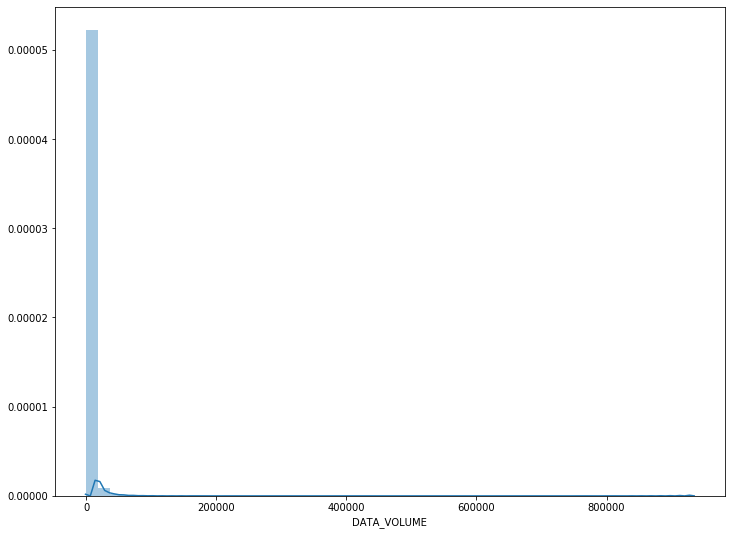

In [44]:
distplot('DATA_VOLUME')# most data volume are below 200000

In [55]:
#tr[(tr['DATA_VOLUME'] <0) & (tr['ORANGE'] < 0 ) & (tr['TIGO'] < 0) & (tr['CHURN'] == 0)]
tr.drop(tr[(tr['DATA_VOLUME'] <0) & (tr['ORANGE'] < 0 ) & (tr['TIGO'] < 0) & (tr['CHURN'] == 0)].index, inplace=True)

#tes[(tes['DATA_VOLUME'] <0) & (tes['ORANGE'] < 0 ) & (tes['TIGO'] < 0)]
tes.drop(tes[(tes['DATA_VOLUME'] <0) & (tes['ORANGE'] < 0 ) & (tes['TIGO'] < 0)].index, inplace=True)

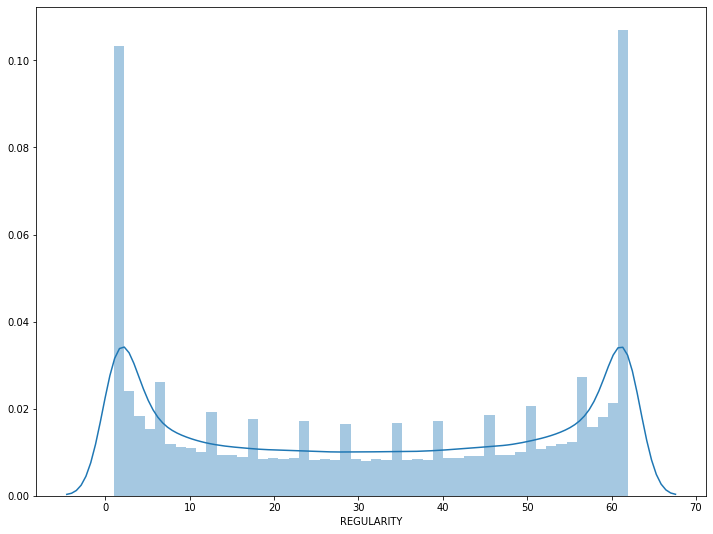

In [68]:
distplot('REGULARITY')

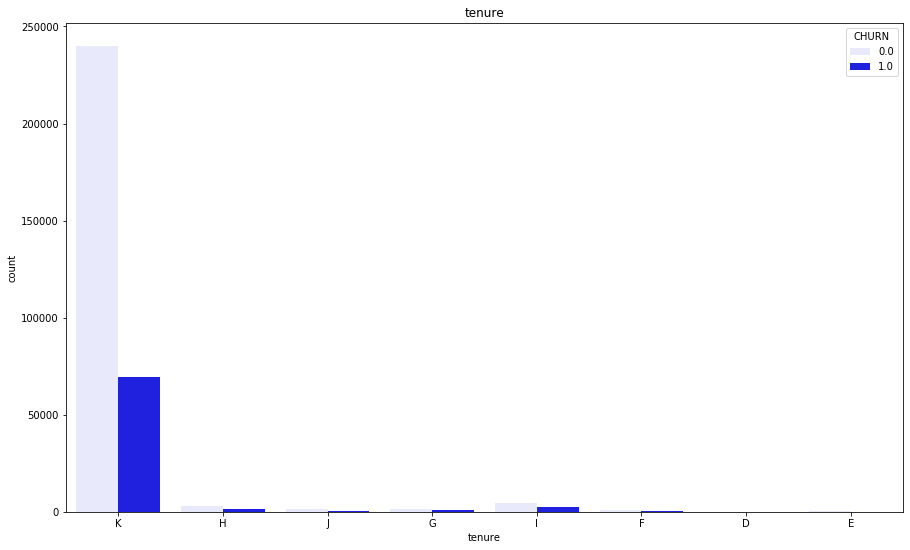

In [70]:
countplot_with_target('tenure')

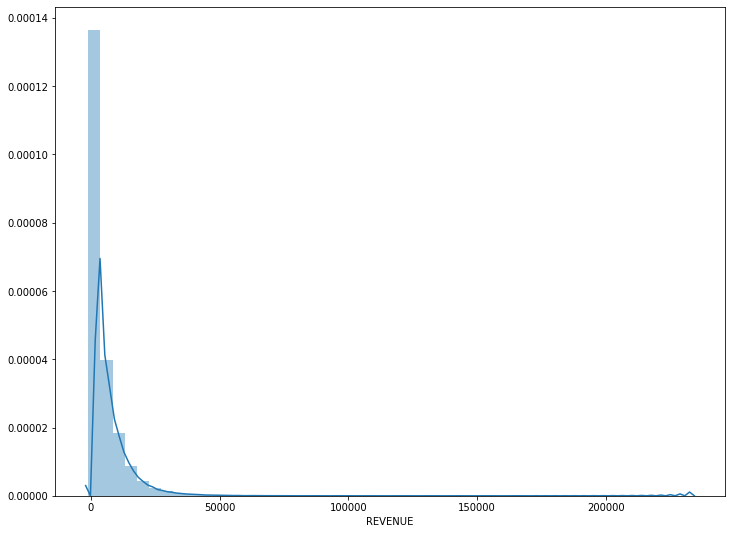

In [71]:
distplot('REVENUE')

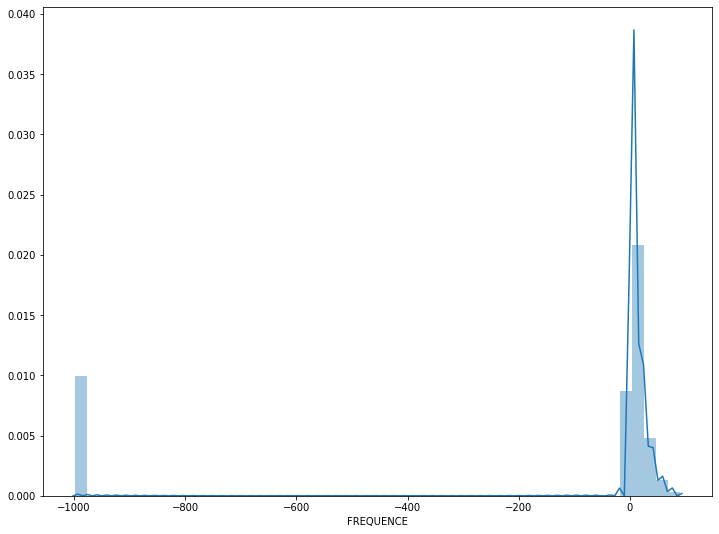

In [73]:
distplot('FREQUENCE') #crazy outlier, because of missing value

In [80]:
display(tr.shape)
display(tes.shape)
tes.head()

(326336, 16)

(66603, 15)

,user_id,REGION,top_pack3,tenure,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
2,a581f4fa08677c26f83f643248c667e241043086,DAKAR,Data,K,1900.0,15.0,2299.0,766.0,21.0,414.0,-999.0,7.0,2.0,27.0,17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,IVR Echat_Daily_50F,K,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,46.0,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,All-net 500F,K,32000.0,47.0,33000.0,11000.0,47.0,-999.0,128.0,555.0,280.0,61.0,65.0
8,e74408b87372327c95136af36ec4155219e07269,DAKAR,Data,K,5500.0,16.0,5611.0,1870.0,17.0,2105.0,65.0,66.0,8.0,56.0,4.0
9,7e6d0759abf78b490862e77284ace9dd9ae42630,DAKAR,On-net 1000F,K,3500.0,4.0,3490.0,1163.0,4.0,123.0,28.0,1.0,-999.0,61.0,2.0


In [89]:
user_train_id = cat_data1['user_id']
user_test_id = cat_data2['user_id']

tr['user_id'] = user_train_id.astype('category').cat.codes
tes['user_id'] = user_test_id.astype('category').cat.codes

In [88]:
tr.head()

,user_id,REGION,top_pack3,tenure,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,345181,SAINT-LOUIS,All-net 500F,K,17000.0,32.0,18000.0,6000.0,34.0,-999.0,97.0,355.0,6.0,62.0,35.0,0.0
1,177472,DAKAR,Data,K,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40.0,22.0,0.0
2,322414,TAMBACOUNDA,All-net 500F,K,1500.0,3.0,1500.0,500.0,3.0,-999.0,30.0,30.0,-999.0,32.0,3.0,0.0
3,381905,FATICK,On net 200F,K,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18.0,3.0,0.0
4,369259,FATICK,All-net 500F,K,-999.0,-999.0,498.0,166.0,3.0,1.0,1.0,3.0,-999.0,50.0,-999.0,0.0


In [93]:
#Using binary encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in ['REGION', 'top_pack3', 'tenure']:
    tr[i] = le.fit_transform(tr[i])
for i_ in ['REGION', 'top_pack3', 'tenure']:
    tes[i_] = le.fit_transform(tes[i_])

In [101]:
tr.head(11)

,user_id,REGION,top_pack3,tenure,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,345181,9,12,7,17000.0,32.0,18000.0,6000.0,34.0,-999.0,97.0,355.0,6.0,62.0,35.0,0.0
1,177472,0,21,7,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40.0,22.0,0.0
2,322414,11,12,7,1500.0,3.0,1500.0,500.0,3.0,-999.0,30.0,30.0,-999.0,32.0,3.0,0.0
3,381905,2,50,7,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18.0,3.0,0.0
4,369259,2,12,7,-999.0,-999.0,498.0,166.0,3.0,1.0,1.0,3.0,-999.0,50.0,-999.0,0.0
5,68635,12,21,7,5500.0,9.0,5359.0,1786.0,19.0,6084.0,7.0,12.0,5.0,30.0,7.0,0.0
7,222738,9,12,4,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,5.0,-999.0,1.0
8,368802,11,21,7,22500.0,8.0,22230.0,7410.0,16.0,14956.0,6336.0,1017.0,185.0,62.0,3.0,0.0
11,36174,12,66,7,300.0,3.0,300.0,100.0,3.0,169.0,8.0,1.0,0.0,47.0,2.0,0.0
12,286897,7,50,7,3300.0,9.0,2996.0,999.0,10.0,0.0,547.0,9.0,0.0,54.0,4.0,0.0


In [100]:
tes.head(11)

,user_id,REGION,top_pack3,tenure,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
2,64779,0,13,7,1900.0,15.0,2299.0,766.0,21.0,414.0,-999.0,7.0,2.0,27.0,17.0
3,39516,0,23,7,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,46.0,3.0
4,5329,0,8,7,32000.0,47.0,33000.0,11000.0,47.0,-999.0,128.0,555.0,280.0,61.0,65.0
8,90390,0,13,7,5500.0,16.0,5611.0,1870.0,17.0,2105.0,65.0,66.0,8.0,56.0,4.0
9,49472,0,39,7,3500.0,4.0,3490.0,1163.0,4.0,123.0,28.0,1.0,-999.0,61.0,2.0
10,81674,0,50,5,1450.0,7.0,1451.0,484.0,10.0,0.0,3.0,8.0,10.0,31.0,2.0
11,9400,0,8,7,1500.0,2.0,1084.0,361.0,3.0,-999.0,-999.0,8.0,-999.0,14.0,-999.0
12,17698,4,38,7,1400.0,5.0,1401.0,467.0,6.0,-999.0,493.0,12.0,7.0,53.0,3.0
14,83488,0,13,7,4000.0,5.0,4000.0,1333.0,13.0,2257.0,-999.0,7.0,-999.0,45.0,2.0
17,91848,6,31,7,12500.0,22.0,13398.0,4466.0,26.0,0.0,375.0,340.0,4.0,62.0,12.0


In [102]:
train = tr.copy()
test = tes.copy()

In [103]:
print('The shape in train data:', train.shape)
print('The shape in test data:', test.shape)

The shape in train data: (326336, 16)
The shape in test data: (66603, 15)


In [104]:
X = train.drop(['CHURN'], axis=1)
y = train['CHURN']

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit

In [106]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.35, random_state=42)

for train,test in sss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

In [107]:
print('Data points in X_train data:', X_train.shape)
print('Data points in X_test data:', X_test.shape)
print('Data points in y_train:', y_train.shape)
print('Data points in y_test:', y_test.shape)

Data points in X_train data: (212118, 15)
Data points in X_test data: (114218, 15)
Data points in y_train: (212118,)
Data points in y_test: (114218,)


In [108]:
#how they are distributed in the target

print('The ratio class0 - class1 in y_target =', y_train.value_counts().values/len(y_train))
print('\nThe ratio class0 - class1 in y_test =', y_test.value_counts().values/len(y_test))

The ratio class0 - class1 in y_target = [0.77065124 0.22934876]

The ratio class0 - class1 in y_test = [0.77065786 0.22934214]


In [109]:
#this function is for the confusion matrix plot.
from sklearn.metrics import confusion_matrix, log_loss

def confusion_matrix_plot(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)#confusion matrix itself
    A = (((C.T) / (C.sum(axis=1))).T)#recall, transposing the C then, dividing it by the sum of each element in
                                    # columns, then transposing them again the sum of the row will give 1
    B = (C/C.sum(axis=0))#precision, dividing the matrix C by the sum of the element in the columns, the
                         # sum of the columns will give 1
    
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    
    cmap=sns.light_palette("blue")
    #representing C in heatmap.
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap='copper', fmt='.3f', xticklabels=labels, yticklabels=labels).set_ylim(len(C)-0.1, -0.1)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion_matrix")
    
    plt.subplot(1,3,2)
    #representing A in heatmap.
    sns.heatmap(A, annot=True, cmap='copper', fmt= '.3f', xticklabels=labels, yticklabels=labels).set_ylim(len(A)-0.1, -0.1)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall")
    
    plt.subplot(1,3,3)
    #representing B in heatmap.
    sns.heatmap(B, annot=True, cmap='copper', fmt='.3f', xticklabels=labels, yticklabels=labels).set_ylim(len(B)-0.1, -0.1)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision")
    
    plt.show()
    

## Building random model (i.e the worst case)

Log_loss on the test data using random model is 0.8835113348218891


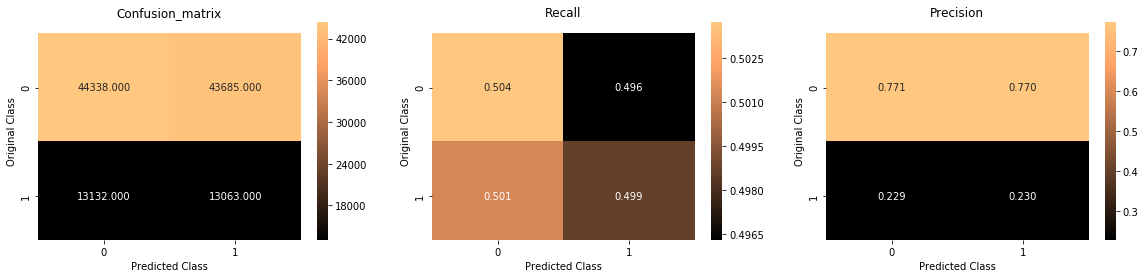

In [110]:
test_len = len(y_test)

y_predn = np.zeros((test_len,2))

for i in range ((test_len)):
    rand_probs = np.random.rand(1,2)
    y_predn[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print('Log_loss on the test data using random model is', log_loss(y_test, y_predn, eps=1e-15))

y_predn = np.argmax(y_predn, axis=1)

confusion_matrix_plot(y_test, y_predn)

The alpha iteration 1e-05 and it's log loss is: 0.5384802144806917
The alpha iteration 0.0001 and it's log loss is: 0.5384802144806917
The alpha iteration 0.001 and it's log loss is: 0.5384802144806917
The alpha iteration 0.01 and it's log loss is: 0.5384802144806917
The alpha iteration 0.1 and it's log loss is: 0.24631877488137896
The alpha iteration 1 and it's log loss is: 0.2250637813845679
The alpha iteration 10 and it's log loss is: 0.2356073627729562
The alpha iteration 100 and it's log loss is: 0.22987961155799394


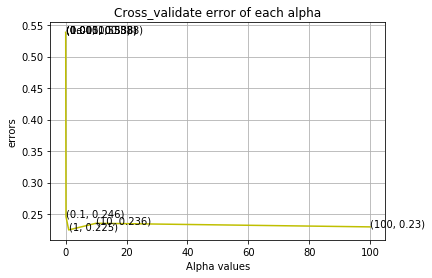

For alpha 1 train log loss is 0.22567646537338448
For alpha 1 test log loss is 0.2250637813845679

Total no of points: 114218


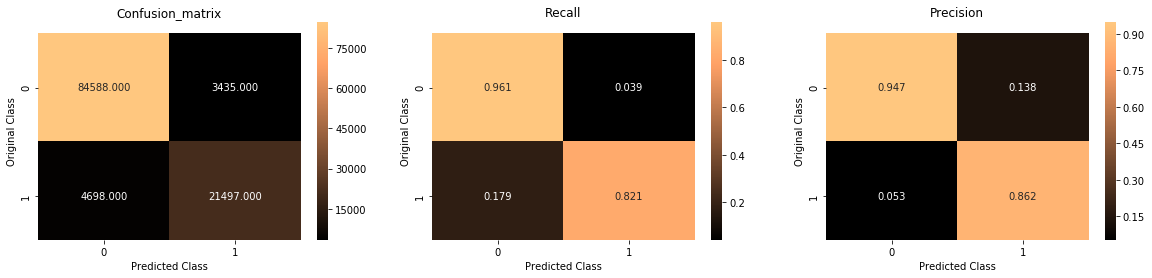

In [111]:
#logistic regression with hyperparameter turning
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

alpha = [10**x for x in range(-5, 3)]

log_loss_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train, y_train)
    y_pred = sig_clf.predict_proba(X_test)
    log_loss_array.append(log_loss(y_test, y_pred, labels= clf.classes_, eps=1e-15))
    print('The alpha iteration', i, "and it's log loss is:", log_loss(y_test, y_pred, labels= clf.classes_, eps=1e-15))

#trying to plot the eblow method for cross validation   
fig, ax dicted = np.argmax(y_pred, axis=1)
print('\nTotal no of points:', len(y_predicted))
#calling the confusion matrix plot function
confusion_matrix_plot(y_test,y_predicted)

The alpha iteration 1e-05 and it's log loss is: 0.5384802144806917
The alpha iteration 0.0001 and it's log loss is: 0.5384802144806917
The alpha iteration 0.001 and it's log loss is: 0.5384802144806917
The alpha iteration 0.01 and it's log loss is: 0.5384802144806917
The alpha iteration 0.1 and it's log loss is: 0.5384802144806917
The alpha iteration 1 and it's log loss is: 0.5384802144806917
The alpha iteration 10 and it's log loss is: 0.5384802144806917
The alpha iteration 100 and it's log loss is: 0.5384802144806917


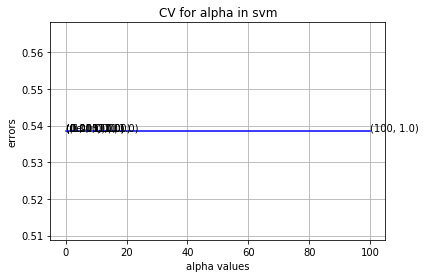

loss on the train data: 0.5384882416258846
loss on the test data: 0.5384802144806917
Total length data for predicted: 114218


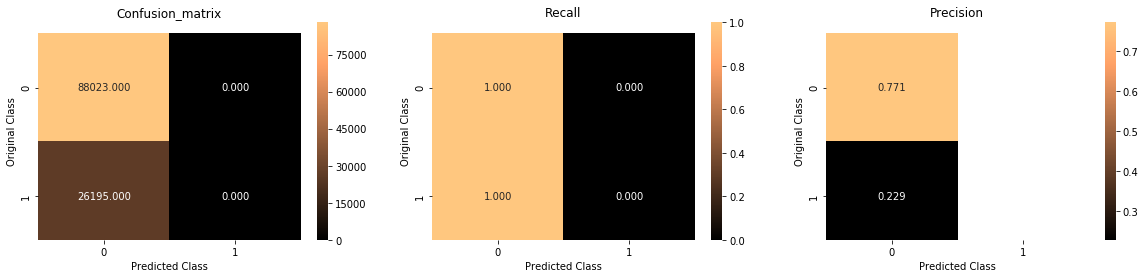

In [113]:
#linearSVC using hinges
from sklearn.svm import LinearSVC 
alpha = [10**x for x in range(-5, 3)]

log_error = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train, y_train)
    y_pred = sig_clf.predict_proba(X_test)
    log_error.append(log_loss(y_test, y_pred, labels=clf.classes_, eps=1e-15))
    print('The alpha iteration', i, "and it's log loss is:", log_loss(y_test, y_pred, labels= clf.classes_, eps=1e-15))
                     
                     
fig,ax = plt.subplots()
ax.plot(alpha, log_error, c='b')
for i,txt in enumerate(np.round(log_error)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], log_error[i]))
plt.grid()
plt.title("CV for alpha in svm")
plt.xlabel('alpha values')
plt.ylabel('errors')
plt.show()

best_alpha = np.argmin(log_error)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(X_train, y_train)
y_pred = sig_clf.predict_proba(X_test)

pred_y = sig_clf.predict_proba(X_train)
print('loss on the train data:', log_loss(y_train, pred_y, labels=clf.classes_, eps=1e-15))
y_pred = sig_clf.predict_proba(X_test)
print('loss on the test data:', log_loss(y_test, y_pred, labels=clf.classes_, eps=1e-15))
predicted_y = np.argmax(y_pred, axis=1)
print('Total length data for predicted:', len(predicted_y))

confusion_matrix_plot(y_test, predicted_y)

In [114]:
from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier(n_estimators=500, random_state=42)
ran.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [115]:
sig_clf = CalibratedClassifierCV(ran, method= 'sigmoid')
sig_clf.fit(X_train, y_train)
y_pred = sig_clf.predict_proba(X_test)

training log_loss is: 0.02986745394172086
testing log_loss is: 0.12019720032664805
Rows of prediction: 114218


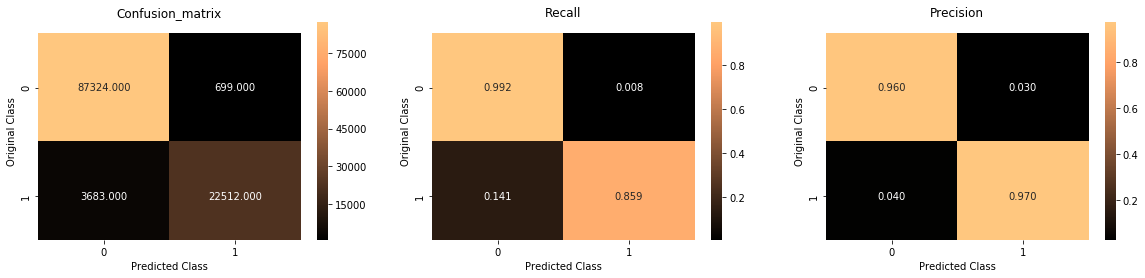

In [116]:
pred_y = sig_clf.predict_proba(X_train)
print('training log_loss is:', log_loss(y_train, pred_y, labels=ran.classes_, eps=1e-15))

y_pred = sig_clf.predict_proba(X_test)
print('testing log_loss is:', log_loss(y_test, y_pred, labels=ran.classes_, eps=1e-15))

predicted_y = np.argmax(y_pred, axis=1)
print('Rows of prediction:', len(predicted_y))

#confusion matrix plot
confusion_matrix_plot(y_test, predicted_y)

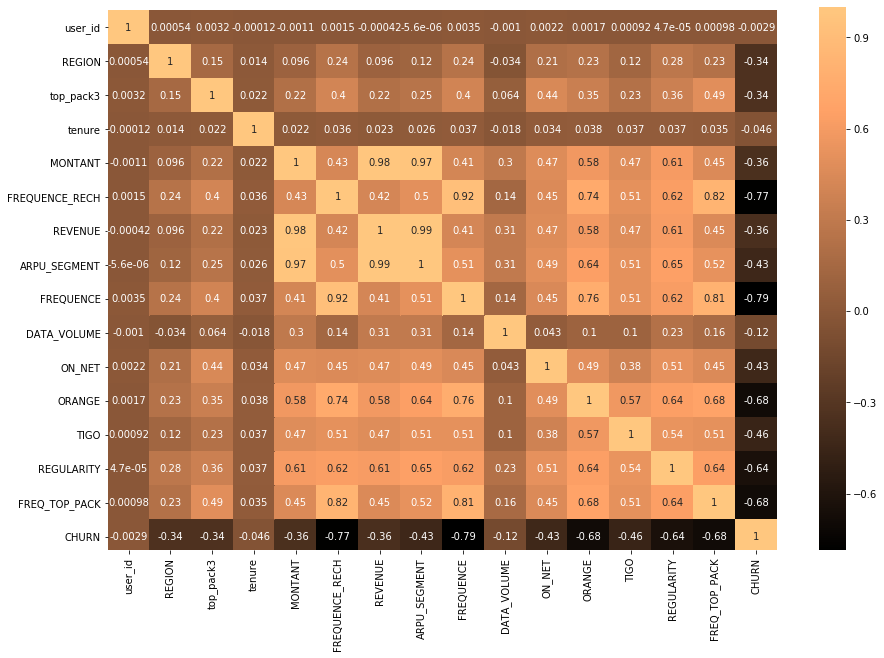

In [120]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='copper').set_ylim(len(corr)-0.1, -0.1)
plt.show()

In [129]:
pred = sig_clf.predict_proba(tes)

In [148]:
pred = pred[:,1]

In [173]:
sub.CHURN = pd.Series(y_pred[:,1])

In [143]:
sub1.CHURN = pred[:,1]

In [149]:
pred_ = pd.Series(pred)

In [150]:
sub.CHURN = pred_

In [174]:
sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.018403
1,5335efd940280b82143272275637d1e65d37eadb,0.018631
2,a581f4fa08677c26f83f643248c667e241043086,0.018063
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.018127
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.018553


In [175]:
sub.to_csv('Random(1).csv', index=False, float_format='%.3f')

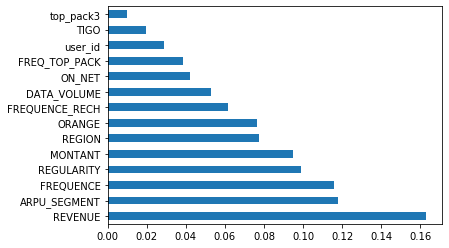

In [121]:
#feature importance

feat_im = pd.Series(ran.feature_importances_, index=X_train.columns)
feat_im.nlargest(14).plot(kind='barh')

In [126]:
#checking to adjust and look into inbalance classes
total =tr['CHURN'].value_counts()
print(total)
print('\nThe percent of class 0: {:.2f}%'.format((100*total[0]/len(tr))))
print('The percent of class 1: {:.2f}%'.format((100*total[1]/len(tr))))

0.0    251492
1.0     74844
Name: CHURN, dtype: int64

The percent of class 0: 77.07%
The percent of class 1: 22.93%


In [127]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,predicted_y)

0.9257297713385255

In [89]:
#upsampling imbalance dataset

#from sklearn.utils import resample

#df_minority = train[train.target==0]*least class
#df_majority = train[train.target==1]*having the highest class

# Upsamping minority class.
#df_minority_upsampled = resample(df_minority,replace=True,n_samples=34(value to match majority),random_state=123(reproducible result))

# Combining them together
#df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=1)

# Then we can display it
#df_upsampled.target.value_counts()

In [177]:
#from sklearn.utils import resample
#df_min = train[train['CHURN']==1]
#df_maj = train[train['CHURN']==0]

#df_min_up = resample(df_min, replace=True, n_samples=174844, random_state=123)
#df_upsampled = pd.concat([df_maj, df_min_up])
#df_upsampled['CHURN'].value_counts()

In [125]:
test_pred = ran.predict_proba(test)

In [128]:
test_pred = test_pred[:,1]

In [132]:
test_pred = pd.Series(test_pred)

sub.CHURN = test_pred

In [133]:
sub.to_csv('Random.csv', index=False, float_format='%.3f')

In [176]:
import xgboost as xgb

params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4
params['silent'] = 1

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]
clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=300, verbose_eval=10)

xgbmat = xgb.DMatrix(X_train,y_train)
predict_y = clf.predict(d_test)
print('The test log loss is:', log_loss(y_test, predict_y, labels=ran.classes_, eps=1e-15))

[0]	train-logloss:0.67573	valid-logloss:0.675956
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 300 rounds.
[10]	train-logloss:0.535402	valid-logloss:0.536015
[20]	train-logloss:0.436535	valid-logloss:0.436875
[30]	train-logloss:0.36346	valid-logloss:0.364066
[40]	train-logloss:0.308716	valid-logloss:0.309417
[50]	train-logloss:0.26702	valid-logloss:0.267726
[60]	train-logloss:0.2346	valid-logloss:0.235347
[70]	train-logloss:0.208959	valid-logloss:0.209752
[80]	train-logloss:0.189017	valid-logloss:0.189851
[90]	train-logloss:0.173343	valid-logloss:0.174196
[100]	train-logloss:0.1608	valid-logloss:0.161626
[110]	train-logloss:0.151131	valid-logloss:0.151875
[120]	train-logloss:0.143288	valid-logloss:0.144147
[130]	train-logloss:0.136967	valid-logloss:0.13788
[140]	train-logloss:0.131898	valid-logloss:0.132777
[150]	train-logloss:0.127861	valid-logloss:0.128729
[160]	train-logloss:0.124279	valid-

The total number of points: 114218


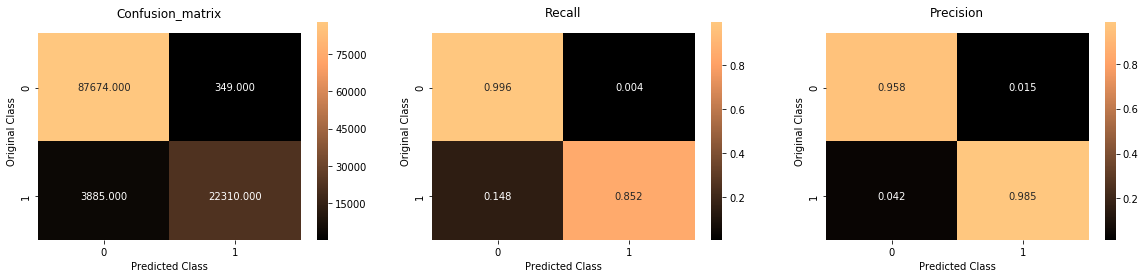

In [178]:
predicted_y = np.array(predict_y>0.5, dtype=int)
print('The total number of points:', len(predicted_y))
confusion_matrix_plot(y_test, predicted_y)

In [179]:
sube = pd.DataFrame()

In [180]:
sube['user_id'] = sub.user_id

In [181]:
sube['user_id']

0        af900d87e73b7ff6509d2203df4704a98aa5f2a6
1        5335efd940280b82143272275637d1e65d37eadb
2        a581f4fa08677c26f83f643248c667e241043086
3        64f67177d0775262b8087a9e2e3b8061b6324ae6
4        0d6009a4594c4be22449b8d9cc01a0bcea98faea
                           ...                   
99995    c6bcb3336795a18eb6c0bc7e19078a0704ef4d7e
99996    a44b4e44dc70115ed5bf971ebb4193dd536e87f0
99997    a2f84faffbc995bd0e2d726fa4ffdb93f11646ed
99998    afa76e894df4201fc77eb714de7d1f262299611a
99999    c08a2d84b87c1f5d4bb318114f508b77aa8e2663
Name: user_id, Length: 100000, dtype: object

In [183]:
sube.target

0        0.012029
1        0.034655
2        0.000888
3        0.000277
4        0.000580
           ...   
99995    0.999643
99996    0.000361
99997    0.999713
99998    0.011836
99999    0.999240
Name: target, Length: 100000, dtype: float32

In [187]:
sube.to_csv('xgboost.csv', index=False, float_format='%.4f')